<a href="https://colab.research.google.com/github/CoraxKolkrabe/Metricas-datos-y-calibracion-inteligente/blob/main/Metricas%2C_datos_y_calibracion_inteligente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files

# 1. Subir el archivo
uploaded = files.upload()

# 2. Nombre del archivo
nombre_archivo = "Datos Estaciones AMB.xlsx"

# 3. Leer Excel
df = pd.read_excel(nombre_archivo, sheet_name=0)

# 4. Reemplazar "NoData" por NaN
df = df.replace("NoData", pd.NA)

# 5. Renombrar columnas (aj√∫stalas seg√∫n tu Excel)
df.columns = [
    "timestamp", "PM10", "pm25_ref", "NO2", "O3",
    "Temp_Aire", "Lluvia", "Humedad", "WD", "WS", "R_Solar"
]

# 6. Convertir columna timestamp a datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce", dayfirst=True)

# 7. Guardar CSV limpio
df.to_csv("datos_limpios.csv", index=False)

# 8. Descargar
files.download("datos_limpios.csv")

Saving Datos Estaciones AMB.xlsx to Datos Estaciones AMB (1).xlsx


/tmp/ipython-input-3853642666.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce", dayfirst=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import glob

# 1. Buscar todos los archivos que terminan en "_pm25a.csv"
archivos = glob.glob("*_pm25a.csv")
print("Archivos encontrados:", archivos)

# 2. Lista para ir guardando los DataFrames
dfs = []

for f in archivos:
    try:
        df_temp = pd.read_csv(f)

        # Si el archivo no tiene filas, lo saltamos
        if df_temp.empty:
            print(f"‚ö†Ô∏è Archivo vac√≠o ignorado: {f}")
            continue

        # Asegurar columnas correctas
        if "fecha_hora_med" not in df_temp.columns or "valor" not in df_temp.columns:
            print(f"‚ö†Ô∏è Archivo con columnas incorrectas ignorado: {f}")
            continue

        # Convertir tipos
        df_temp["fecha_hora_med"] = pd.to_datetime(df_temp["fecha_hora_med"], utc=True, errors="coerce")
        df_temp["valor"] = pd.to_numeric(df_temp["valor"], errors="coerce")

        dfs.append(df_temp)

    except Exception as e:
        print(f"‚ö†Ô∏è Error procesando {f}: {e}")

# 3. Concatenar todo
if dfs:
    df_all = pd.concat(dfs, ignore_index=True)
    df_all = df_all.sort_values("fecha_hora_med").reset_index(drop=True)

    print("\n‚úÖ Datos consolidados con √©xito")
    print(df_all.head())
    print("\nTotal de registros:", len(df_all))

    # 4. Guardar en CSV final
    nombre_salida = "pm25_all.csv"
    df_all.to_csv(nombre_salida, index=False)

    from google.colab import files
    files.download(nombre_salida)
else:
    print("‚ùå No se encontraron datos v√°lidos en los archivos.")
import pandas as pd
from google.colab import files

# 1. Subir varios archivos a la vez (selecciona los 10 desde tu PC)
uploaded = files.upload()

# 2. Procesar cada archivo
for nombre_archivo in uploaded.keys():
    print(f"\nProcesando: {nombre_archivo}")

    # Leer CSV
    df = pd.read_csv(nombre_archivo)

    # Normalizar nombres de columnas (sin comillas, espacios, min√∫sculas)
    df.columns = df.columns.str.strip().str.strip('"').str.lower()

    # Renombrar para estandarizar
    df = df.rename(columns={
        "fecha_hora_med": "fecha_hora_med",
        "fecha_hora": "fecha_hora_med",   # algunos archivos usan "fecha_hora"
        "id_parametro": "id_parametro",
        "valor": "valor"
    })

    # Verificar que las columnas necesarias existan
    columnas_necesarias = {"fecha_hora_med", "id_parametro", "valor"}
    if not columnas_necesarias.issubset(set(df.columns)):
        print(f"‚ö†Ô∏è El archivo {nombre_archivo} no tiene las columnas esperadas. Se omitir√°.")
        continue

    # Convertir fecha/hora a datetime
    df["fecha_hora_med"] = pd.to_datetime(df["fecha_hora_med"], errors="coerce", utc=True)

    # Filtrar solo pm25_a
    df_pm25 = df[df["id_parametro"].str.lower() == "pm25_a"].copy()

    # Convertir valores a num√©ricos
    df_pm25["valor"] = pd.to_numeric(df_pm25["valor"], errors="coerce")

    # Resetear √≠ndice
    df_pm25 = df_pm25.reset_index(drop=True)

    # Nombre del archivo de salida
    nombre_salida = nombre_archivo.replace(".csv", "_pm25a.csv")
    df_pm25.to_csv(nombre_salida, index=False)

    print(f"   Guardado: {nombre_salida}")

# 3. Descargar todos los archivos limpios
for nombre_archivo in uploaded.keys():
    nombre_salida = nombre_archivo.replace(".csv", "_pm25a.csv")
    try:
        files.download(nombre_salida)
    except:
        print(f"‚ö†Ô∏è No se gener√≥ salida para: {nombre_archivo}")


Saving mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59 (1).csv
Saving mediciones_clg_normalsup_pm25_a_2019-03-01T00_00_00_2019-03-31T23_59_59.csv to mediciones_clg_normalsup_pm25_a_2019-03-01T00_00_00_2019-03-31T23_59_59 (1).csv
Savi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

‚ö†Ô∏è No se gener√≥ salida para: mediciones_clg_normalsup_pm25_a_2019-03-01T00_00_00_2019-03-31T23_59_59 (1).csv
‚ö†Ô∏è No se gener√≥ salida para: mediciones_clg_normalsup_pm25_a_2019-02-01T00_00_00_2019-02-28T23_59_59 (1).csv
‚ö†Ô∏è No se gener√≥ salida para: mediciones_clg_normalsup_pm25_a_2019-01-01T00_00_00_2019-01-31T23_59_59 (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import glob

# 1. Buscar todos los archivos que terminan en "_pm25a.csv"
archivos = glob.glob("*_pm25a.csv")
print("Archivos encontrados:", archivos)

# 2. Lista para ir guardando los DataFrames
dfs = []

for f in archivos:
    try:
        df_temp = pd.read_csv(f)

        # Si el archivo no tiene filas, lo saltamos
        if df_temp.empty:
            print(f"‚ö†Ô∏è Archivo vac√≠o ignorado: {f}")
            continue

        # Asegurar columnas correctas
        if "fecha_hora_med" not in df_temp.columns or "valor" not in df_temp.columns:
            print(f"‚ö†Ô∏è Archivo con columnas incorrectas ignorado: {f}")
            continue

        # Convertir tipos
        df_temp["fecha_hora_med"] = pd.to_datetime(df_temp["fecha_hora_med"], utc=True, errors="coerce")
        df_temp["valor"] = pd.to_numeric(df_temp["valor"], errors="coerce")

        dfs.append(df_temp)

    except Exception as e:
        print(f"‚ö†Ô∏è Error procesando {f}: {e}")

# 3. Concatenar todo
if dfs:
    df_all = pd.concat(dfs, ignore_index=True)
    df_all = df_all.sort_values("fecha_hora_med").reset_index(drop=True)

    print("\n‚úÖ Datos consolidados con √©xito")
    print(df_all.head())
    print("\nTotal de registros:", len(df_all))

    # 4. Guardar en CSV final
    nombre_salida = "pm25_all.csv"
    df_all.to_csv(nombre_salida, index=False)

    from google.colab import files
    files.download(nombre_salida)
else:
    print("‚ùå No se encontraron datos v√°lidos en los archivos.")


Archivos encontrados: ['mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-04-01T00_00_00_2019-04-30T23_59_59 (1)_pm25a.csv', 'mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59_pm25a.csv', 'mediciones_cl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Rango de fechas: 2018-11-03 23:32:49.639000+00:00 ‚Üí 2019-09-01 04:03:01.820000+00:00
N√∫mero total de registros: 8356
Valores nulos por columna:
 fecha_hora_med    8
id_parametro      0
valor             0
dtype: int64


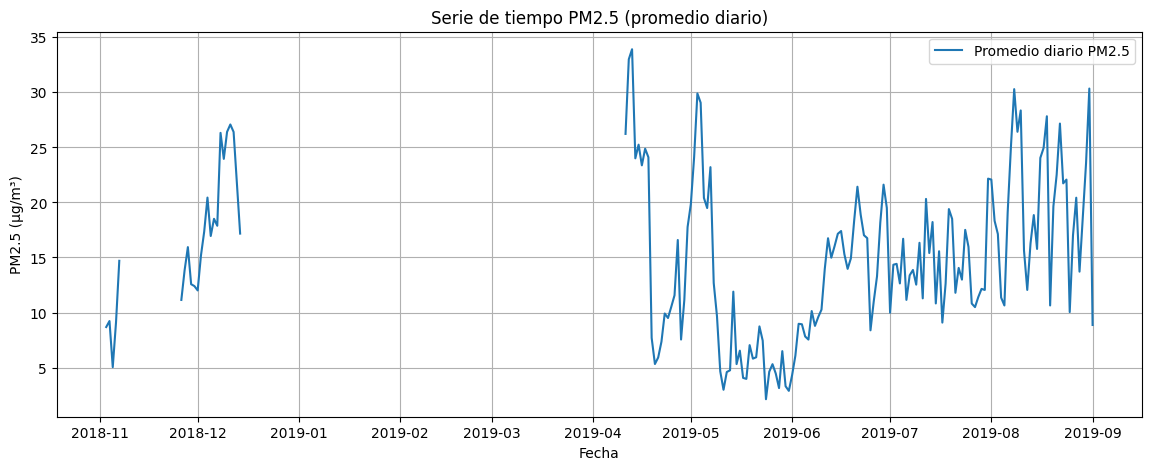


Estad√≠sticas de PM2.5:
count    8356.000000
mean       14.325161
std         9.127371
min         0.000000
25%         7.416667
50%        12.500001
75%        19.500000
max        64.142853
Name: valor, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar el dataset consolidado
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])

# 2. Revisar info b√°sica
print("Rango de fechas:", df["fecha_hora_med"].min(), "‚Üí", df["fecha_hora_med"].max())
print("N√∫mero total de registros:", len(df))
print("Valores nulos por columna:\n", df.isnull().sum())

# 3. Re-samplear por d√≠a (promedio)
df_daily = df.set_index("fecha_hora_med").resample("D")["valor"].mean()

# 4. Graficar serie de tiempo diaria
plt.figure(figsize=(14,5))
plt.plot(df_daily.index, df_daily.values, label="Promedio diario PM2.5")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (¬µg/m¬≥)")
plt.title("Serie de tiempo PM2.5 (promedio diario)")
plt.legend()
plt.grid(True)
plt.show()

# 5. Estad√≠sticas descriptivas
print("\nEstad√≠sticas de PM2.5:")
print(df["valor"].describe())


üìä Estad√≠sticas b√°sicas:
count    3884.000000
mean       14.934679
std         9.032387
min         0.416667
25%         7.833334
50%        13.416667
75%        20.839286
max        39.083336
Name: valor, dtype: float64


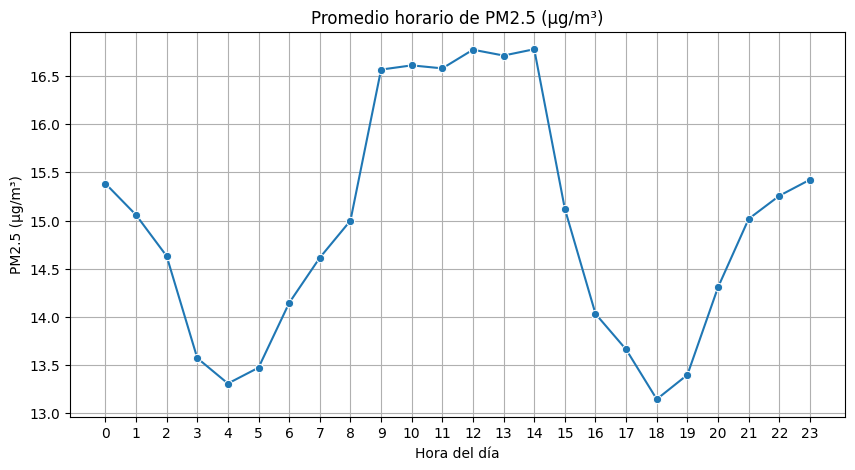

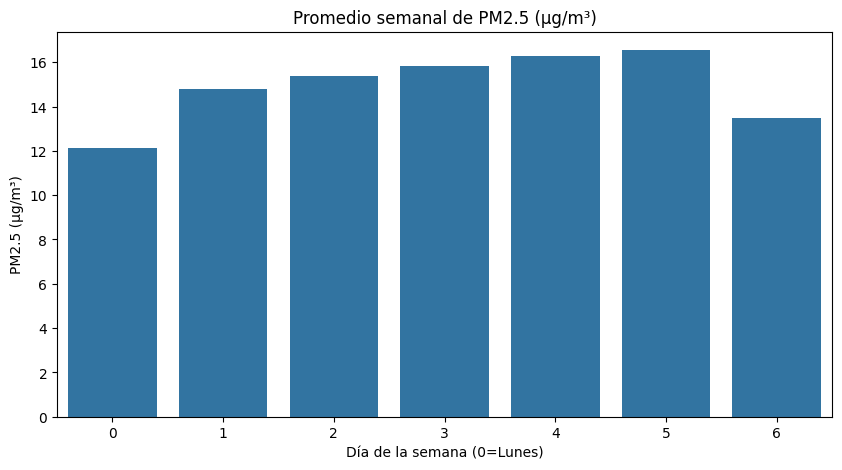

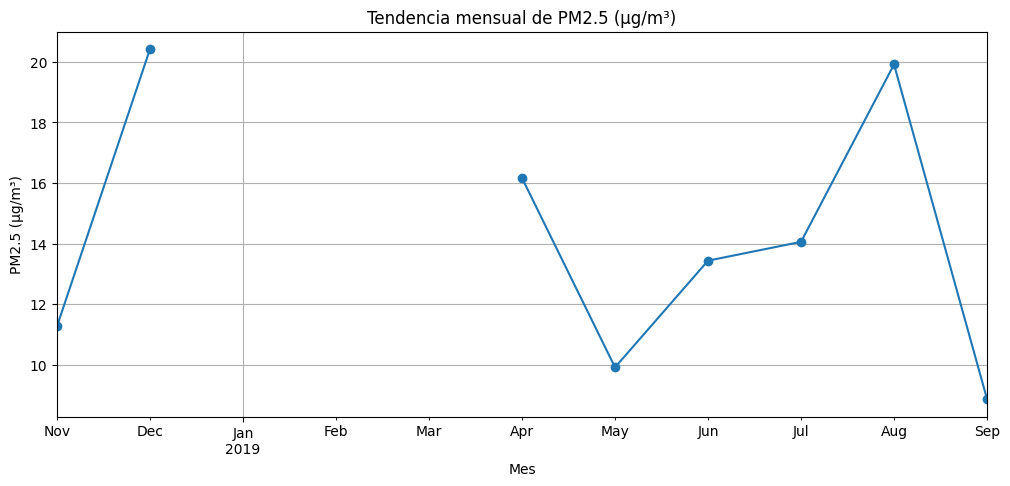

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Estad√≠sticas descriptivas ===
print("üìä Estad√≠sticas b√°sicas:")
print(df_limpio.describe())

# === 2. Promedio por hora del d√≠a ===
df_hourly = df_limpio.groupby(df_limpio.index.hour).mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=df_hourly.index, y=df_hourly.values, marker="o")
plt.title("Promedio horario de PM2.5 (¬µg/m¬≥)")
plt.xlabel("Hora del d√≠a")
plt.ylabel("PM2.5 (¬µg/m¬≥)")
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

# === 3. Promedio por d√≠a de la semana ===
# (0 = Lunes, 6 = Domingo)
df_weekly = df_limpio.groupby(df_limpio.index.dayofweek).mean()

plt.figure(figsize=(10,5))
sns.barplot(x=df_weekly.index, y=df_weekly.values)
plt.title("Promedio semanal de PM2.5 (¬µg/m¬≥)")
plt.xlabel("D√≠a de la semana (0=Lunes)")
plt.ylabel("PM2.5 (¬µg/m¬≥)")
plt.show()

# === 4. Promedio mensual ===
df_monthly = df_limpio.groupby(df_limpio.index.to_period("M")).mean()

plt.figure(figsize=(12,5))
df_monthly.plot(kind="line", marker="o", legend=False)
plt.title("Tendencia mensual de PM2.5 (¬µg/m¬≥)")
plt.ylabel("PM2.5 (¬µg/m¬≥)")
plt.xlabel("Mes")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

df_test = pd.read_csv("pm25_all.csv")
print(df_test.columns)


Index(['fecha_hora_med', 'id_parametro', 'valor'], dtype='object')


/tmp/ipython-input-2934450466.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df_pm25["valor"].resample("H").mean()


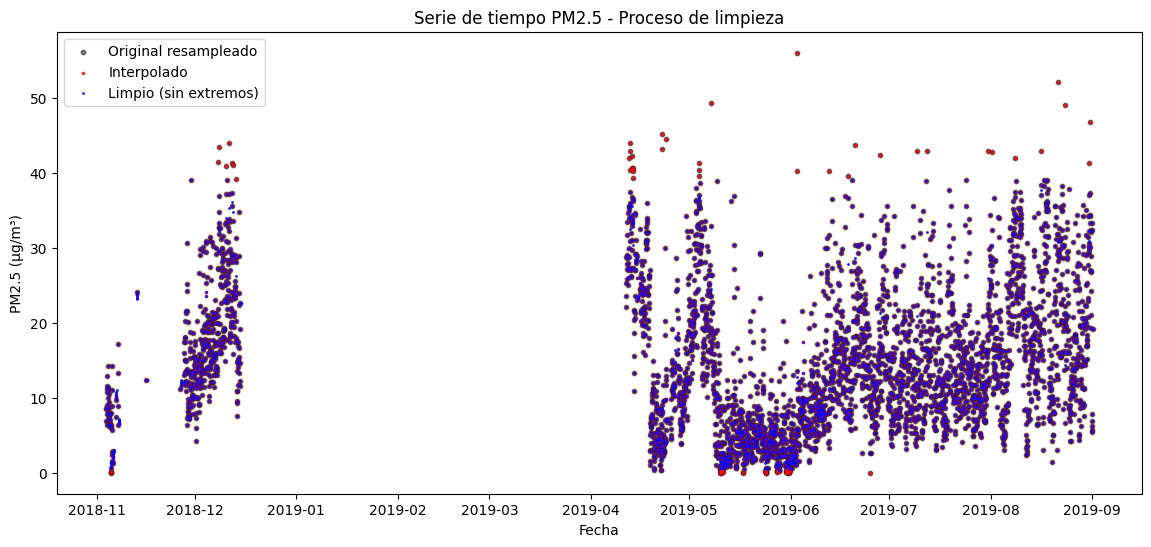

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Cargar datos ===
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])
df = df.set_index("fecha_hora_med").sort_index()

# === 2. Filtrar PM2.5 si fuera necesario ===
df_pm25 = df[df["id_parametro"] == "pm25_a"].copy()

# === 3. Resamplear a frecuencia horaria ===
df_resampled = df_pm25["valor"].resample("H").mean()

# === 4. Interpolar huecos cortos (m√°x 3 horas seguidas) ===
df_interpolado = df_resampled.interpolate(limit=3)

# === 5. Tratar valores extremos (outliers) ===
q_low = df_interpolado.quantile(0.01)   # percentil 1%
q_high = df_interpolado.quantile(0.99)  # percentil 99%

# Reemplazar extremos por NaN
df_limpio = df_interpolado.where(
    (df_interpolado >= q_low) & (df_interpolado <= q_high)
)

# Interpolar otra vez para cubrir NaN de extremos
df_limpio = df_limpio.interpolate(limit=3)

# === 6. Visualizaci√≥n con puntos ===
plt.figure(figsize=(14,6))

# Puntos grises = datos originales resampleados
plt.scatter(df_resampled.index, df_resampled,
            label="Original resampleado", alpha=0.5, color="black", s=10)

# Puntos naranjas = datos interpolados
plt.scatter(df_interpolado.index, df_interpolado,
            label="Interpolado", alpha=0.7, color="red", s=3)

# Puntos azules = datos limpios (sin extremos)
plt.scatter(df_limpio.index, df_limpio,
            label="Limpio (sin extremos)", alpha=0.9, color="blue", s=1)

plt.title("Serie de tiempo PM2.5 - Proceso de limpieza")
plt.xlabel("Fecha")
plt.ylabel("PM2.5 (¬µg/m¬≥)")
plt.legend()
plt.show()


/tmp/ipython-input-852328663.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df["valor"].resample("H").mean()


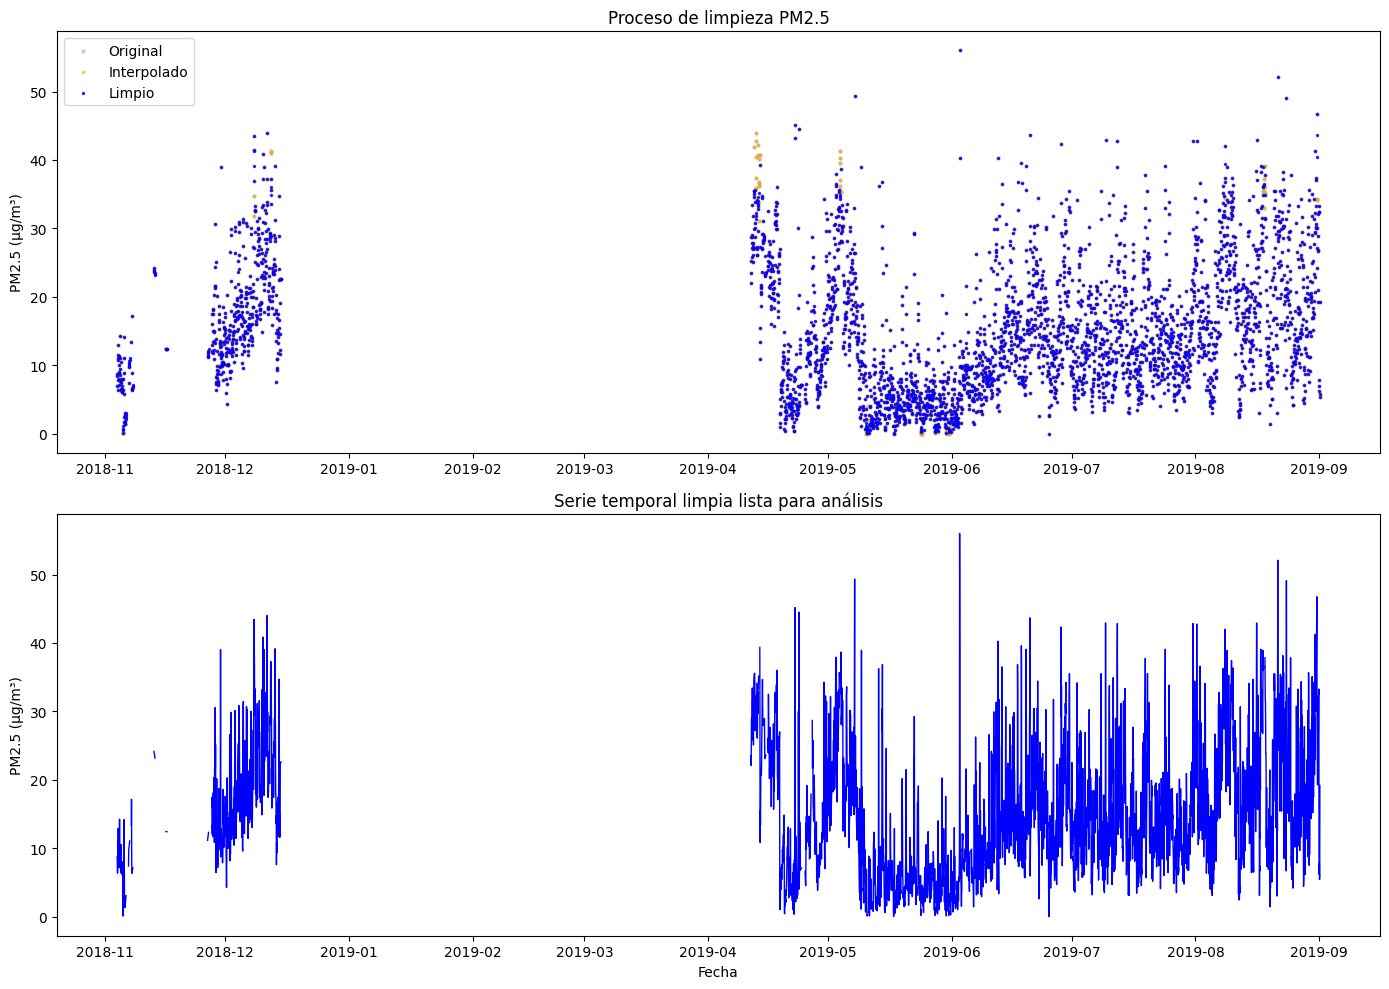

Datos originales: 7230 puntos
Datos despu√©s de limpieza: 7230 puntos
Porcentaje de datos v√°lidos: 53.4%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Cargar datos ===
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])
df = df.set_index("fecha_hora_med").sort_index()

# === 2. Resamplear a frecuencia horaria (TODO primero) ===
df_resampled = df["valor"].resample("H").mean()

# === 3. Interpolar huecos cortos ===
df_interpolado = df_resampled.interpolate(limit=3)

# === 4. Suavizar para mejor detecci√≥n de outliers ===
df_suavizado = df_interpolado.rolling(window=6, center=True, min_periods=1).mean()

# === 5. Tratar valores extremos ===
q_low = df_suavizado.quantile(0.01)
q_high = df_suavizado.quantile(0.99)

# Crear m√°scara basada en datos suavizados, aplicar a datos interpolados
mascara = (df_suavizado >= q_low) & (df_suavizado <= q_high)
df_limpio = df_interpolado.where(mascara)

# Interpolar NaN resultantes de quitar outliers
df_limpio = df_limpio.interpolate(limit=3)

# === 6. Guardar resultados ===
df_final = pd.DataFrame({
    'original': df_resampled,
    'interpolado': df_interpolado,
    'limpio': df_limpio
})
df_final.to_csv('pm25_procesado.csv')

# === 7. Visualizaci√≥n mejorada ===
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Proceso completo
ax1.scatter(df_resampled.index, df_resampled, alpha=0.3, color="gray", s=5, label="Original")
ax1.scatter(df_interpolado.index, df_interpolado, alpha=0.5, color="orange", s=3, label="Interpolado")
ax1.scatter(df_limpio.index, df_limpio, alpha=0.8, color="blue", s=2, label="Limpio")
ax1.set_ylabel("PM2.5 (¬µg/m¬≥)")
ax1.legend()
ax1.set_title("Proceso de limpieza PM2.5")

# Resultado final
ax2.plot(df_limpio.index, df_limpio, color="blue", linewidth=1)
ax2.set_ylabel("PM2.5 (¬µg/m¬≥)")
ax2.set_xlabel("Fecha")
ax2.set_title("Serie temporal limpia lista para an√°lisis")

plt.tight_layout()
plt.savefig('limpieza_pm25.png', dpi=300)
plt.show()

print(f"Datos originales: {len(df_resampled)} puntos")
print(f"Datos despu√©s de limpieza: {len(df_limpio)} puntos")
print(f"Porcentaje de datos v√°lidos: {100*(df_limpio.notna().sum()/len(df_limpio)):.1f}%")

In [ ]:
# === 1. Cargar datos ===
df = pd.read_csv("pm25_all.csv", parse_dates=["fecha_hora_med"])

# --- Arreglar problemas de fechas ---
df["fecha_hora_med"] = df["fecha_hora_med"].dt.floor("h")  # mejor usar 'h'

# Eliminar filas con fechas nulas
df = df.dropna(subset=["fecha_hora_med"])

# Ordenar expl√≠citamente por fecha
df = df.sort_values("fecha_hora_med")

# Quitar duplicados
df = df.drop_duplicates(subset="fecha_hora_med")

# Crear √≠ndice monot√≥nico
df = df.set_index("fecha_hora_med")

print("Rango de fechas en los datos crudos:")
print(df.index.min(), " -> ", df.index.max())

# === 2. Verificar ahora en Febrero 2019 ===
df_febrero = df.loc["2019-02-01":"2019-02-10"]
print("\nDatos crudos en Febrero 2019:")
print(df_febrero.head(20))

# === 3. Filtrar solo PM2.5 ===
df_pm25 = df[df["id_parametro"] == "pm25_a"].copy()
df_pm25_febrero = df_pm25.loc["2019-02-01":"2019-02-10"]

print("\nPM2.5 en Febrero 2019 (datos crudos):")
print(df_pm25_febrero.head(20))


Rango de fechas en los datos crudos:
2018-11-03 23:00:00+00:00  ->  2019-09-01 04:00:00+00:00

Datos crudos en Febrero 2019:
Empty DataFrame
Columns: [id_parametro, valor]
Index: []

PM2.5 en Febrero 2019 (datos crudos):
Empty DataFrame
Columns: [id_parametro, valor]
Index: []


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform

# === 1. Asegurar que la serie est√° limpia y resampleada a 1H ===
# (si ya tienes df_limpio con √≠ndice datetime, seguimos)

# === 2. Reorganizar en formato "d√≠a x hora" ===
df_daily = df_limpio.to_frame(name="pm25").copy()
df_daily["fecha"] = df_daily.index.date
df_daily["hora"] = df_daily.index.hour

# Crear matriz: filas = d√≠as, columnas = horas
matriz_dias = df_daily.pivot(index="fecha", columns="hora", values="pm25")

# === 3. Calcular distancias eucl√≠deas ===
# Usamos pdist para pares de d√≠as, luego convertimos a matriz cuadrada
distancias = pdist(matriz_dias.fillna(0), metric="euclidean")
matriz_distancias = squareform(distancias)

# Convertimos a DataFrame para mejor lectura
df_distancias = pd.DataFrame(
    matriz_distancias,
    index=matriz_dias.index,
    columns=matriz_dias.index
)

# === 4. Mostrar ejemplo ===
print("Matriz de distancias (primeros 5 d√≠as):")
print(df_distancias.iloc[:5, :5])


Matriz de distancias (primeros 5 d√≠as):
fecha       2018-11-03  2018-11-04  2018-11-05  2018-11-06  2018-11-07
fecha                                                                 
2018-11-03    0.000000   45.120246   31.243300   16.827908   37.443400
2018-11-04   45.120246    0.000000   28.658695   40.972541   33.279019
2018-11-05   31.243300   28.658695    0.000000   30.988653   29.794223
2018-11-06   16.827908   40.972541   30.988653    0.000000   33.996275
2018-11-07   37.443400   33.279019   29.794223   33.996275    0.000000


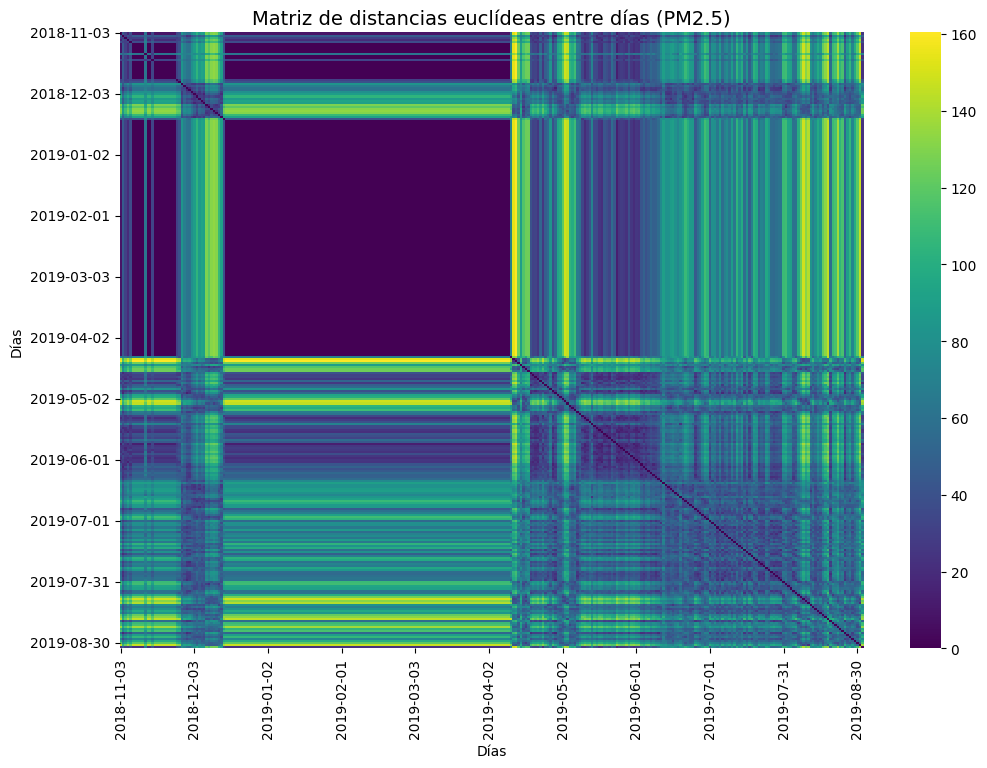

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Reorganizar en formato "d√≠a x hora" ===
df_daily = df_limpio.to_frame(name="pm25").copy()
df_daily["fecha"] = df_daily.index.date
df_daily["hora"] = df_daily.index.hour

# Crear matriz: filas = d√≠as, columnas = horas
matriz_dias = df_daily.pivot(index="fecha", columns="hora", values="pm25")

# === 2. Calcular distancias eucl√≠deas entre d√≠as ===
distancias = pdist(matriz_dias.fillna(0), metric="euclidean")
matriz_distancias = squareform(distancias)

# Convertimos a DataFrame
df_distancias = pd.DataFrame(
    matriz_distancias,
    index=matriz_dias.index,
    columns=matriz_dias.index
)

# === 3. Graficar heatmap ===
plt.figure(figsize=(12,8))
sns.heatmap(df_distancias, cmap="viridis", xticklabels=30, yticklabels=30)
plt.title("Matriz de distancias eucl√≠deas entre d√≠as (PM2.5)", fontsize=14)
plt.xlabel("D√≠as")
plt.ylabel("D√≠as")
plt.show()


In [ ]:
import os
import glob

# Ver todos los archivos CSV en el directorio actual
print("=== ARCHIVOS DISPONIBLES ===")
archivos_csv = glob.glob("*.csv")
for archivo in archivos_csv:
    print(f"- {archivo}")

# Ver tambi√©n archivos en subdirectorios
print("\n=== BUSCANDO EN SUBDIRECTORIOS ===")
for root, dirs, files in os.walk("."):
    for file in files:
        if file.endswith(".csv"):
            print(f"- {os.path.join(root, file)}")

=== ARCHIVOS DISPONIBLES ===
- mediciones_clg_normalsup_pm25_a_2019-01-01T00_00_00_2019-01-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-06-01T00_00_00_2019-06-30T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59.csv
- pm25_all.csv
- mediciones_clg_normalsup_pm25_a_2019-08-01T00_00_00_2019-08-31T23_59_59_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2018-12-01T00_00_00_2018-12-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2019-05-01T00_00_00_2019-05-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_a_2018-11-01T00_00_00_2018-11-30T23_59_59 (1)_pm25a.csv
- mediciones_clg_normalsup_pm25_a_2019-07-01T00_00_00_2019-07-31T23_59_59 (1).csv
- mediciones_clg_normalsup_pm25_

In [ ]:
import pandas as pd
import numpy as np

# Primero veamos qu√© hay exactamente en el archivo de referencia
print("=== DIAGN√ìSTICO DEL ARCHIVO 'Datos Estaciones AMB.csv' ===")

# Leer como texto plano para ver la estructura real
try:
    with open('Datos Estaciones AMB.csv', 'r', encoding='utf-8') as f:
        lineas = f.readlines()

    print(f"Total de l√≠neas en el archivo: {len(lineas)}")
    print("\n--- Primeras 10 l√≠neas del archivo ---")
    for i in range(min(10, len(lineas))):
        print(f"L√≠nea {i+1}: {repr(lineas[i][:100])}")  # Mostrar primeros 100 caracteres

    print(f"\n--- L√≠nea problem√°tica 67 ---")
    if len(lineas) >= 67:
        print(f"L√≠nea 67: {repr(lineas[66])}")
    else:
        print("El archivo tiene menos de 67 l√≠neas")

except UnicodeDecodeError:
    # Intentar con encoding latino
    with open('Datos Estaciones AMB.csv', 'r', encoding='latin-1') as f:
        lineas = f.readlines()

    print(f"Total de l√≠neas en el archivo: {len(lineas)}")
    print("\n--- Primeras 10 l√≠neas del archivo ---")
    for i in range(min(10, len(lineas))):
        print(f"L√≠nea {i+1}: {repr(lineas[i][:100])}")

=== DIAGN√ìSTICO DEL ARCHIVO 'Datos Estaciones AMB.csv' ===
Total de l√≠neas en el archivo: 8041

--- Primeras 10 l√≠neas del archivo ---
L√≠nea 1: '\ufefftimestamp;PM10;pm25_ref;NO2 ;O3 ;Temp_Aire;Lluvia;Humedad;WD;WS;R_Solar\n'
L√≠nea 2: '1/10/2018 0:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 3: '1/10/2018 1:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 4: '1/10/2018 2:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 5: '1/10/2018 3:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 6: '1/10/2018 4:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 7: '1/10/2018 5:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 8: '1/10/2018 6:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData;NoData\n'
L√≠nea 9: '1/10/2018 7:00;NoData;NoData;NoData;NoData;NoData;NoData;NoData;No

In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo de referencia con los par√°metros correctos
df_ref = pd.read_csv(
    'Datos Estaciones AMB.csv',
    sep=';',                          # Separador es punto y coma
    parse_dates=['timestamp'],        # Columna de fecha se llama timestamp
    index_col='timestamp',            # Usar timestamp como √≠ndice
    na_values=['NoData', '---', ''],  # Tratar estos valores como NaN
    encoding='utf-8-sig'              # Encoding para el BOM (√Ø¬ª¬ø)
)

print("=== DATOS DE REFERENCIA CARGADOS ===")
print(f"Forma del DataFrame: {df_ref.shape}")
print(f"Columnas: {df_ref.columns.tolist()}")
print(f"Rango temporal: {df_ref.index.min()} a {df_ref.index.max()}")
print(f"Total de puntos: {len(df_ref)}")

# Ver las primeras filas
print("\nPrimeras 5 filas:")
print(df_ref.head())

# Ver informaci√≥n del DataFrame
print("\nInformaci√≥n del DataFrame:")
print(df_ref.info())

# Ver valores √∫nicos en la columna pm25_ref para entender los datos
print("\nValores √∫nicos en pm25_ref:")
print(df_ref['pm25_ref'].unique()[:20])  # Primeros 20 valores

=== DATOS DE REFERENCIA CARGADOS ===
Forma del DataFrame: (8040, 10)
Columnas: ['PM10', 'pm25_ref', 'NO2 ', 'O3 ', 'Temp_Aire', 'Lluvia', 'Humedad', 'WD', 'WS', 'R_Solar']
Rango temporal: 1/01/2019 0:00 a 9/12/2018 9:00
Total de puntos: 8040

Primeras 5 filas:
               PM10 pm25_ref NO2   O3  Temp_Aire Lluvia Humedad   WD   WS  \
timestamp                                                                   
1/10/2018 0:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 1:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 2:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 3:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   
1/10/2018 4:00  NaN      NaN  NaN  NaN       NaN    NaN     NaN  NaN  NaN   

               R_Solar  
timestamp               
1/10/2018 0:00     NaN  
1/10/2018 1:00     NaN  
1/10/2018 2:00     NaN  
1/10/2018 3:00     NaN  
1/10/2018 4:00     NaN  

Informaci√≥n del DataFr

In [ ]:
# Verificar si pm25_ref tiene datos v√°lidos
print("=== AN√ÅLISIS DE PM25_REF ===")
print(f"Valores no nulos en pm25_ref: {df_ref['pm25_ref'].notna().sum()}")
print(f"Valores nulos en pm25_ref: {df_ref['pm25_ref'].isna().sum()}")

if df_ref['pm25_ref'].notna().sum() > 0:
    print(f"Rango de valores en pm25_ref: {df_ref['pm25_ref'].min()} a {df_ref['pm25_ref'].max()}")
    print(f"Tipo de datos: {df_ref['pm25_ref'].dtype}")

    # Mostrar algunos valores reales
    valores_reales = df_ref['pm25_ref'].dropna()
    print(f"\nPrimeros 10 valores reales:")
    print(valores_reales.head(10))
else:
    print("‚ö†Ô∏è La columna pm25_ref no tiene datos v√°lidos")

=== AN√ÅLISIS DE PM25_REF ===
Valores no nulos en pm25_ref: 7929
Valores nulos en pm25_ref: 111


TypeError: '<=' not supported between instances of 'float' and 'str'

In [ ]:
# Convertir la columna pm25_ref de texto a num√©rico
print("=== CONVERSI√ìN DE DATOS PM25_REF ===")

# Primero, reemplazar valores problem√°ticos
df_ref['pm25_ref'] = df_ref['pm25_ref'].replace('<Samp', np.nan)

# Convertir coma decimal a punto decimal y luego a num√©rico
df_ref['pm25_ref'] = df_ref['pm25_ref'].str.replace(',', '.', regex=False)
df_ref['pm25_ref'] = pd.to_numeric(df_ref['pm25_ref'], errors='coerce')

print(f"Valores no nulos despu√©s de conversi√≥n: {df_ref['pm25_ref'].notna().sum()}")
print(f"Valores nulos despu√©s de conversi√≥n: {df_ref['pm25_ref'].isna().sum()}")

if df_ref['pm25_ref'].notna().sum() > 0:
    print(f"Rango de valores en pm25_ref: {df_ref['pm25_ref'].min():.1f} a {df_ref['pm25_ref'].max():.1f} Œºg/m¬≥")
    print(f"Tipo de datos: {df_ref['pm25_ref'].dtype}")

    # Estad√≠sticas b√°sicas
    print(f"Media: {df_ref['pm25_ref'].mean():.2f} Œºg/m¬≥")
    print(f"Desviaci√≥n est√°ndar: {df_ref['pm25_ref'].std():.2f} Œºg/m¬≥")

    # Verificar el √≠ndice temporal
    print(f"\n=== √çNDICE TEMPORAL ===")
    print(f"Rango temporal corregido: {df_ref.index.min()} a {df_ref.index.max()}")

    # Ordenar por √≠ndice (por si las fechas est√°n mezcladas)
    df_ref = df_ref.sort_index()
    print(f"Rango despu√©s de ordenar: {df_ref.index.min()} a {df_ref.index.max()}")

=== CONVERSI√ìN DE DATOS PM25_REF ===
Valores no nulos despu√©s de conversi√≥n: 7921
Valores nulos despu√©s de conversi√≥n: 119
Rango de valores en pm25_ref: 1.3 a 66.9 Œºg/m¬≥
Tipo de datos: float64
Media: 15.23 Œºg/m¬≥
Desviaci√≥n est√°ndar: 10.20 Œºg/m¬≥

=== √çNDICE TEMPORAL ===
Rango temporal corregido: 1/01/2019 0:00 a 9/12/2018 9:00
Rango despu√©s de ordenar: 1/01/2019 0:00 a 9/12/2018 9:00


In [ ]:
# Verificar el problema con las fechas
print("=== VERIFICACI√ìN DE FECHAS ===")
print("Primeras 10 fechas:")
print(df_ref.index[:10])
print("\n√öltimas 10 fechas:")
print(df_ref.index[-10:])

# Parece que las fechas est√°n en formato d√≠a/mes/a√±o pero se interpretaron mal
# Vamos a recrear el √≠ndice temporal correctamente

# Primero, resetear el √≠ndice para trabajar con las fechas como columna
df_ref_reset = df_ref.reset_index()

# Convertir la columna timestamp al formato correcto (d√≠a/mes/a√±o)
df_ref_reset['timestamp_corr'] = pd.to_datetime(df_ref_reset['timestamp'], format='%d/%m/%Y %H:%M', errors='coerce')

# Verificar si hay problemas con la conversi√≥n
fechas_invalidas = df_ref_reset['timestamp_corr'].isna().sum()
print(f"\nFechas que no pudieron convertirse: {fechas_invalidas}")

if fechas_invalidas == 0:
    # Establecer el nuevo √≠ndice temporal correcto
    df_ref_corregido = df_ref_reset.set_index('timestamp_corr')
    df_ref_corregido = df_ref_corregido.sort_index()
    df_ref = df_ref_corregido[['pm25_ref']]  # Mantener solo la columna que nos interesa

    print(f"‚úì Fechas corregidas correctamente")
    print(f"Rango temporal REAL: {df_ref.index.min()} a {df_ref.index.max()}")
else:
    print("‚ö†Ô∏è Hay problemas con el formato de fechas")
    # Mostrar las filas problem√°ticas
    print(df_ref_reset[df_ref_reset['timestamp_corr'].isna()].head())

=== VERIFICACI√ìN DE FECHAS ===
Primeras 10 fechas:
Index(['1/01/2019 0:00', '1/01/2019 10:00', '1/01/2019 11:00',
       '1/01/2019 12:00', '1/01/2019 13:00', '1/01/2019 14:00',
       '1/01/2019 15:00', '1/01/2019 16:00', '1/01/2019 17:00',
       '1/01/2019 18:00'],
      dtype='object', name='timestamp')

√öltimas 10 fechas:
Index(['9/12/2018 22:00', '9/12/2018 23:00', '9/12/2018 2:00',
       '9/12/2018 3:00', '9/12/2018 4:00', '9/12/2018 5:00', '9/12/2018 6:00',
       '9/12/2018 7:00', '9/12/2018 8:00', '9/12/2018 9:00'],
      dtype='object', name='timestamp')

Fechas que no pudieron convertirse: 0
‚úì Fechas corregidas correctamente
Rango temporal REAL: 2018-10-01 00:00:00 a 2019-08-31 23:00:00


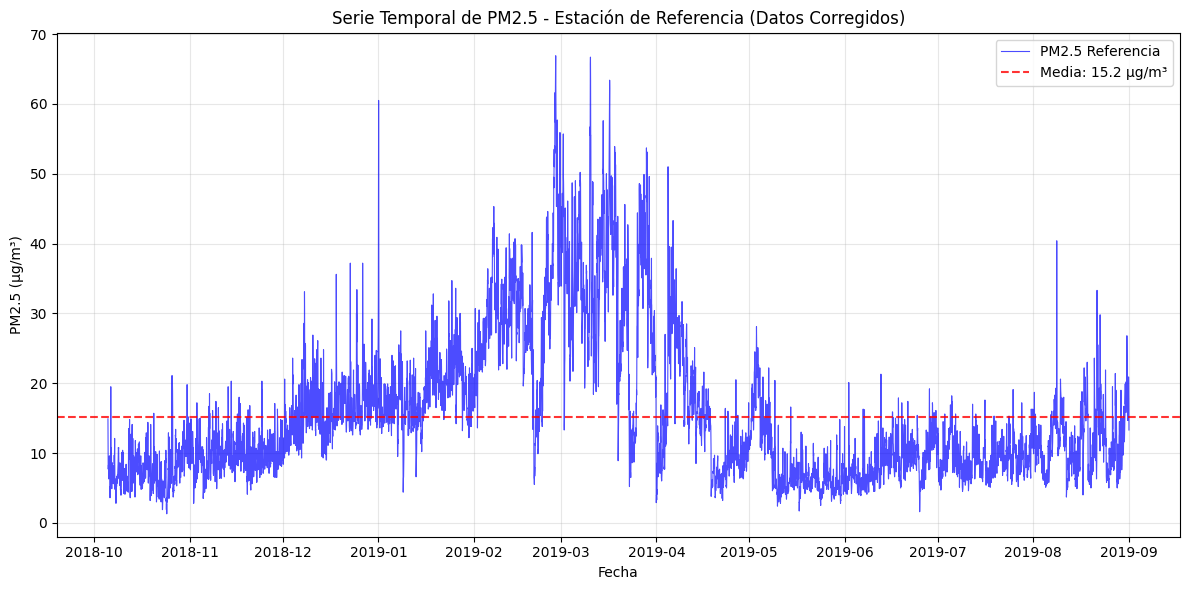

=== RESUMEN FINAL REFERENCIA ===
Per√≠odo de datos: 2018-10-01 a 2019-08-31
Total de puntos: 8040
Puntos v√°lidos PM2.5: 7921
Porcentaje de datos v√°lidos: 98.5%
Media: 15.23 ¬± 10.20 Œºg/m¬≥


In [ ]:
import matplotlib.pyplot as plt

# Visualizar la serie temporal de referencia CORREGIDA
plt.figure(figsize=(12, 6))

# Graficar solo los datos v√°lidos (sin NaN)
datos_validos = df_ref['pm25_ref'].dropna()
plt.plot(datos_validos.index, datos_validos, 'b-', alpha=0.7, linewidth=0.8, label='PM2.5 Referencia')

plt.title('Serie Temporal de PM2.5 - Estaci√≥n de Referencia (Datos Corregidos)')
plt.xlabel('Fecha')
plt.ylabel('PM2.5 (Œºg/m¬≥)')
plt.grid(True, alpha=0.3)

# Mostrar estad√≠sticas
media = datos_validos.mean()
plt.axhline(y=media, color='red', linestyle='--', alpha=0.8, label=f'Media: {media:.1f} Œºg/m¬≥')
plt.legend()

plt.tight_layout()
plt.show()

print("=== RESUMEN FINAL REFERENCIA ===")
print(f"Per√≠odo de datos: {df_ref.index.min().strftime('%Y-%m-%d')} a {df_ref.index.max().strftime('%Y-%m-%d')}")
print(f"Total de puntos: {len(df_ref)}")
print(f"Puntos v√°lidos PM2.5: {len(datos_validos)}")
print(f"Porcentaje de datos v√°lidos: {len(datos_validos)/len(df_ref)*100:.1f}%")
print(f"Media: {datos_validos.mean():.2f} ¬± {datos_validos.std():.2f} Œºg/m¬≥")

In [ ]:
# Convertir el √≠ndice IoT a tz-naive (quitar timezone)
df_iot.index = df_iot.index.tz_localize(None)

print("=== DATOS IoT CORREGIDOS ===")
print(f"Per√≠odo IoT (sin timezone): {df_iot.index.min()} a {df_iot.index.max()}")
print(f"Tipo de √≠ndice IoT: {type(df_iot.index[0])}")

# Ahora s√≠ podemos comparar las fechas
superposicion_inicio = max(df_ref.index.min(), df_iot.index.min())
superposicion_fin = min(df_ref.index.max(), df_iot.index.max())

print(f"\n=== SUPERPOSICI√ìN TEMPORAL ===")
print(f"Per√≠odo com√∫n: {superposicion_inicio} a {superposicion_fin}")

# Filtrar ambos datasets al per√≠odo com√∫n
df_ref_comun = df_ref[(df_ref.index >= superposicion_inicio) & (df_ref.index <= superposicion_fin)]
df_iot_comun = df_iot[(df_iot.index >= superposicion_inicio) & (df_iot.index <= superposicion_fin)]

print(f"Referencia en per√≠odo com√∫n: {len(df_ref_comun)} puntos")
print(f"IoT en per√≠odo com√∫n: {len(df_iot_comun)} puntos")
print(f"Puntos v√°lidos referencia: {df_ref_comun['pm25_ref'].notna().sum()}")
print(f"Puntos v√°lidos IoT: {df_iot_comun['pm25_iot'].notna().sum()}")

=== DATOS IoT CORREGIDOS ===
Per√≠odo IoT (sin timezone): 2018-11-03 23:00:00 a 2019-09-01 04:00:00
Tipo de √≠ndice IoT: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

=== SUPERPOSICI√ìN TEMPORAL ===
Per√≠odo com√∫n: 2018-11-03 23:00:00 a 2019-08-31 23:00:00
Referencia en per√≠odo com√∫n: 7225 puntos
IoT en per√≠odo com√∫n: 7225 puntos
Puntos v√°lidos referencia: 7213
Puntos v√°lidos IoT: 3853


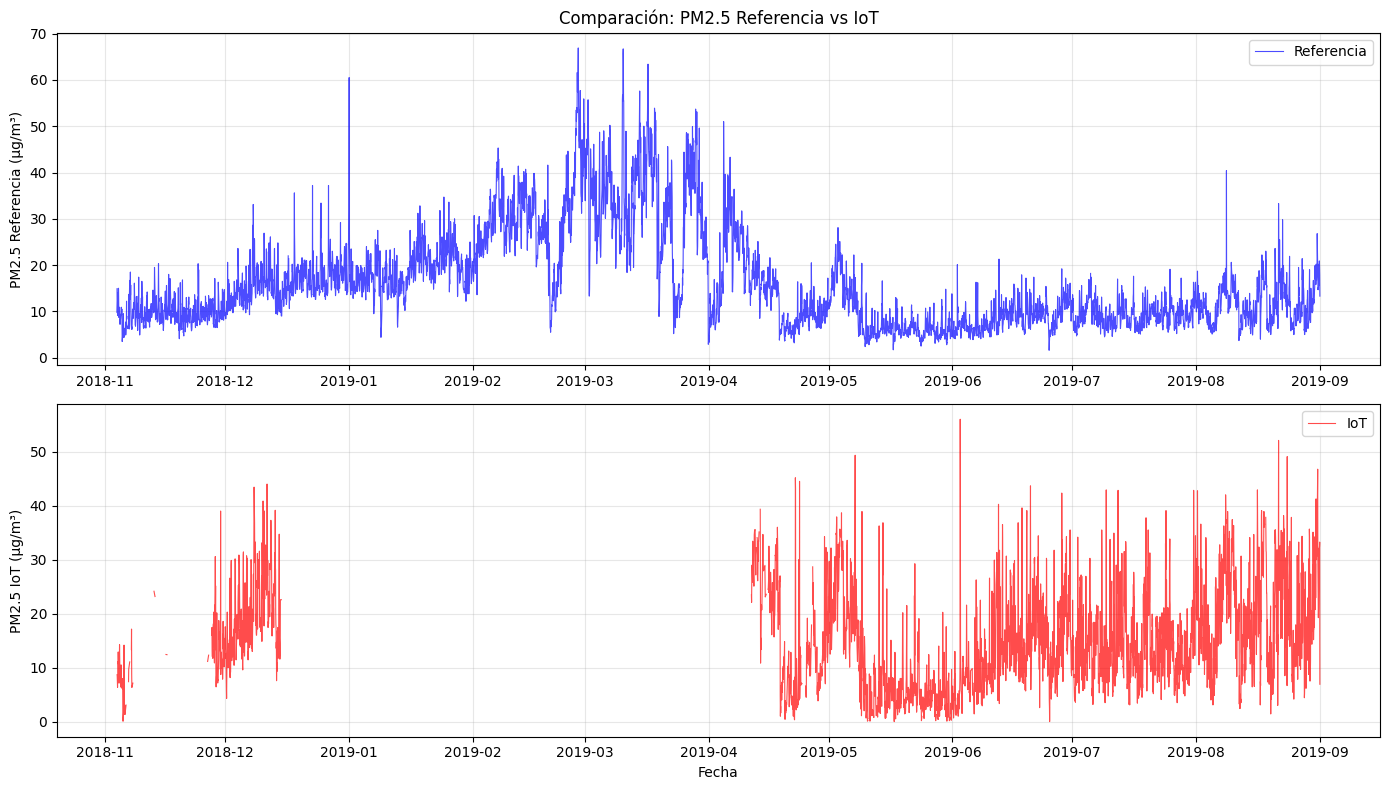

=== ESTAD√çSTICAS COMPARATIVAS ===
REFERENCIA:
  Media: 15.97 Œºg/m¬≥
  Desv std: 10.36 Œºg/m¬≥

IoT:
  Media: 15.00 Œºg/m¬≥
  Desv std: 9.20 Œºg/m¬≥


In [ ]:
# Visualizar ambas series juntas
plt.figure(figsize=(14, 8))

# Graficar referencia
plt.subplot(2, 1, 1)
plt.plot(df_ref_comun.index, df_ref_comun['pm25_ref'], 'b-', alpha=0.7, linewidth=0.8, label='Referencia')
plt.title('Comparaci√≥n: PM2.5 Referencia vs IoT')
plt.ylabel('PM2.5 Referencia (Œºg/m¬≥)')
plt.grid(True, alpha=0.3)
plt.legend()

# Graficar IoT
plt.subplot(2, 1, 2)
plt.plot(df_iot_comun.index, df_iot_comun['pm25_iot'], 'r-', alpha=0.7, linewidth=0.8, label='IoT')
plt.ylabel('PM2.5 IoT (Œºg/m¬≥)')
plt.xlabel('Fecha')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("=== ESTAD√çSTICAS COMPARATIVAS ===")
print("REFERENCIA:")
print(f"  Media: {df_ref_comun['pm25_ref'].mean():.2f} Œºg/m¬≥")
print(f"  Desv std: {df_ref_comun['pm25_ref'].std():.2f} Œºg/m¬≥")

print("\nIoT:")
print(f"  Media: {df_iot_comun['pm25_iot'].mean():.2f} Œºg/m¬≥")
print(f"  Desv std: {df_iot_comun['pm25_iot'].std():.2f} Œºg/m¬≥")

In [ ]:
# Primero, alinear temporalmente ambos datasets
df_comparacion = pd.concat([df_ref_comun['pm25_ref'], df_iot_comun['pm25_iot']], axis=1)
df_comparacion = df_comparacion.dropna()  # Solo puntos donde AMBOS tienen datos

print("=== DATOS ALINEADOS PARA COMPARACI√ìN ===")
print(f"Puntos temporales con datos en AMBOS sensores: {len(df_comparacion)}")
print(f"Porcentaje de cobertura com√∫n: {len(df_comparacion)/len(df_ref_comun)*100:.1f}%")

# Funci√≥n para calcular distancia con promedios m√≥viles
def calcular_distancia_promedios_moviles(df, ventana_horas):
    """
    Calcula distancia eucl√≠dea entre promedios m√≥viles de referencia e IoT
    """
    # Calcular promedios m√≥viles para ambas series
    ref_movil = df['pm25_ref'].rolling(window=ventana_horas, center=True, min_periods=1).mean()
    iot_movil = df['pm25_iot'].rolling(window=ventana_horas, center=True, min_periods=1).mean()

    # Calcular distancia eucl√≠dea (f√≥rmula 1 del enunciado)
    distancia = np.sqrt(((ref_movil - iot_movil)**2).sum())

    return distancia, len(df)

# Probar diferentes tama√±os de ventana
ventanas = [1, 3, 6, 12, 24, 48]  # en horas
resultados = []

print("\n=== AN√ÅLISIS DE DISTANCIAS POR VENTANA ===")
for ventana in ventanas:
    distancia, n_puntos = calcular_distancia_promedios_moviles(df_comparacion, ventana)
    resultados.append({'ventana_horas': ventana, 'distancia': distancia, 'puntos_validos': n_puntos})
    print(f"Ventana: {ventana:2d}h ‚Üí Distancia: {distancia:8.2f} ‚Üí Puntos: {n_puntos}")

resultados_df = pd.DataFrame(resultados)

=== DATOS ALINEADOS PARA COMPARACI√ìN ===
Puntos temporales con datos en AMBOS sensores: 3847
Porcentaje de cobertura com√∫n: 53.2%

=== AN√ÅLISIS DE DISTANCIAS POR VENTANA ===
Ventana:  1h ‚Üí Distancia:   543.34 ‚Üí Puntos: 3847
Ventana:  3h ‚Üí Distancia:   488.53 ‚Üí Puntos: 3847
Ventana:  6h ‚Üí Distancia:   449.24 ‚Üí Puntos: 3847
Ventana: 12h ‚Üí Distancia:   412.70 ‚Üí Puntos: 3847
Ventana: 24h ‚Üí Distancia:   390.44 ‚Üí Puntos: 3847
Ventana: 48h ‚Üí Distancia:   376.99 ‚Üí Puntos: 3847


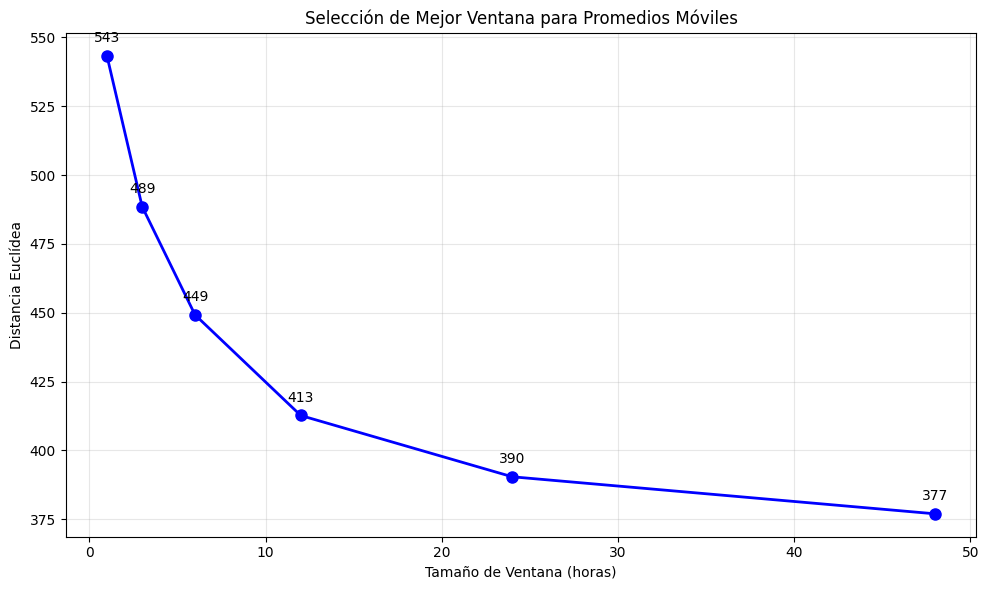


*** VENTANA √ìPTIMA: 48 horas ***


In [ ]:
# Gr√°fica de distancia vs tama√±o de ventana
plt.figure(figsize=(10, 6))
plt.plot(resultados_df['ventana_horas'], resultados_df['distancia'], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Tama√±o de Ventana (horas)')
plt.ylabel('Distancia Eucl√≠dea')
plt.title('Selecci√≥n de Mejor Ventana para Promedios M√≥viles')
plt.grid(True, alpha=0.3)

# Anotar valores
for i, row in resultados_df.iterrows():
    plt.annotate(f'{row["distancia"]:.0f}', (row['ventana_horas'], row['distancia']),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# Elegir ventana √≥ptima (m√≠nima distancia)
ventana_optima = resultados_df.loc[resultados_df['distancia'].idxmin(), 'ventana_horas']
print(f"\n*** VENTANA √ìPTIMA: {ventana_optima} horas ***")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Aplicar ventana √≥ptima de 48 horas
df_comparacion['ref_movil'] = df_comparacion['pm25_ref'].rolling(window=48, center=True, min_periods=1).mean()
df_comparacion['iot_movil'] = df_comparacion['pm25_iot'].rolling(window=48, center=True, min_periods=1).mean()

# Eliminar NaN resultantes
df_movil = df_comparacion[['ref_movil', 'iot_movil']].dropna()

print("=== DATOS PARA CALIBRACI√ìN ===")
print(f"Puntos despu√©s de promedios m√≥viles: {len(df_movil)}")

# Preparar datos para regresi√≥n
X = df_movil['iot_movil'].values.reshape(-1, 1)  # Variable independiente: IoT
y = df_movil['ref_movil'].values                 # Variable dependiente: Referencia

# Ajustar modelo lineal: referencia = Œ± √ó IoT + Œ≤
modelo = LinearRegression()
modelo.fit(X, y)

alpha = modelo.coef_[0]
intercept = modelo.intercept_
r_cuadrado = modelo.score(X, y)

# Predecir con el modelo
y_pred = modelo.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("\n=== MODELO DE CALIBRACI√ìN ===")
print(f"Ecuaci√≥n: PM25_ref = {alpha:.4f} √ó PM25_iot + {intercept:.4f}")
print(f"Coeficiente Œ±: {alpha:.4f}")
print(f"Intercepto Œ≤: {intercept:.4f}")
print(f"R¬≤: {r_cuadrado:.4f}")
print(f"RMSE: {rmse:.4f} Œºg/m¬≥")

if abs(alpha - 1.0) < 0.1 and abs(intercept) < 1.0:
    print("‚úÖ El sensor IoT est√° bien calibrado respecto a la referencia")
else:
    print("üìä Se requiere calibraci√≥n del sensor IoT")

=== DATOS PARA CALIBRACI√ìN ===
Puntos despu√©s de promedios m√≥viles: 3847

=== MODELO DE CALIBRACI√ìN ===
Ecuaci√≥n: PM25_ref = 0.4738 √ó PM25_iot + 3.0721
Coeficiente Œ±: 0.4738
Intercepto Œ≤: 3.0721
R¬≤: 0.8405
RMSE: 1.3524 Œºg/m¬≥
üìä Se requiere calibraci√≥n del sensor IoT


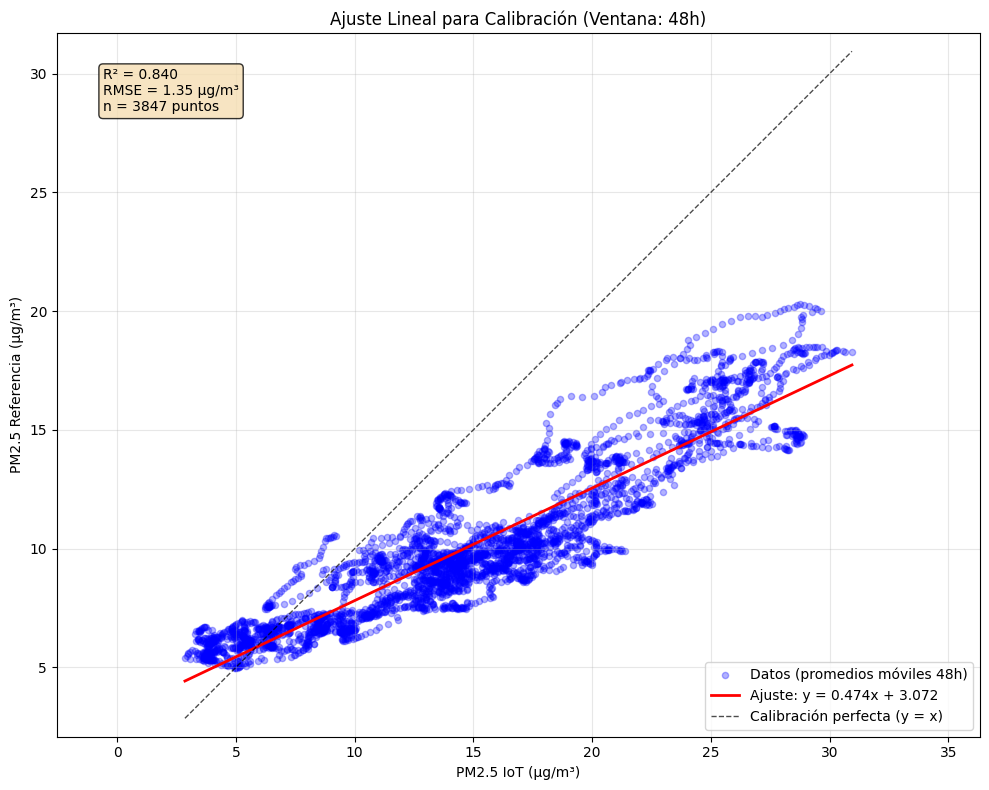

In [ ]:
# Gr√°fico de dispersi√≥n y recta de ajuste
plt.figure(figsize=(10, 8))

# Gr√°fico de dispersi√≥n
plt.scatter(X, y, alpha=0.3, s=20, label='Datos (promedios m√≥viles 48h)', color='blue')

# Recta de ajuste
x_range = np.linspace(X.min(), X.max(), 100)
y_pred_range = modelo.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred_range, 'red', linewidth=2,
         label=f'Ajuste: y = {alpha:.3f}x + {intercept:.3f}')

# L√≠nea de perfecta calibraci√≥n (y = x)
plt.plot(x_range, x_range, 'k--', alpha=0.7, linewidth=1, label='Calibraci√≥n perfecta (y = x)')

plt.xlabel('PM2.5 IoT (Œºg/m¬≥)')
plt.ylabel('PM2.5 Referencia (Œºg/m¬≥)')
plt.title(f'Ajuste Lineal para Calibraci√≥n (Ventana: 48h)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# A√±adir texto con m√©tricas
textstr = f'R¬≤ = {r_cuadrado:.3f}\nRMSE = {rmse:.2f} Œºg/m¬≥\nn = {len(X)} puntos'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

In [ ]:
# Dividir datos en train (70%) y test (30%) temporalmente
punto_division = int(0.7 * len(df_movil))
df_train = df_movil.iloc[:punto_division]
df_test = df_movil.iloc[punto_division:]

print("=== DIVISI√ìN TRAIN/TEST ===")
print(f"Train: {len(df_train)} puntos ({punto_division})")
print(f"Test: {len(df_test)} puntos ({len(df_movil) - punto_division})")

# Entrenar modelo solo con datos de entrenamiento
X_train = df_train['iot_movil'].values.reshape(-1, 1)
y_train = df_train['ref_movil'].values

modelo_train = LinearRegression()
modelo_train.fit(X_train, y_train)

# Predecir en conjunto de test
X_test = df_test['iot_movil'].values.reshape(-1, 1)
y_test = df_test['ref_movil'].values
y_test_pred = modelo_train.predict(X_test)

# Calcular m√©tricas de validaci√≥n
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n=== VALIDACI√ìN EN TEST ===")
print(f"R¬≤ en test: {r2_test:.4f}")
print(f"RMSE en test: {rmse_test:.4f} Œºg/m¬≥")
print(f"Ecuaci√≥n final: y = {modelo_train.coef_[0]:.4f}x + {modelo_train.intercept_:.4f}")

=== DIVISI√ìN TRAIN/TEST ===
Train: 2692 puntos (2692)
Test: 1155 puntos (1155)

=== VALIDACI√ìN EN TEST ===
R¬≤ en test: 0.6355
RMSE en test: 1.4952 Œºg/m¬≥
Ecuaci√≥n final: y = 0.5092x + 2.8874


In [ ]:
# Definir tolerancia (error aceptable en Œºg/m¬≥)
tolerancia = 5.0  # ¬±5 Œºg/m¬≥ es una tolerancia razonable para PM2.5

# Calcular errores absolutos
errores = np.abs(y_test - y_test_pred)
dentro_tolerancia = errores <= tolerancia

# M√©tricas de precisi√≥n
precision_tolerancia = dentro_tolerancia.mean() * 100
error_medio = np.mean(errores)

print("\=== EVALUACI√ìN CON TOLERANCIA ===")
print(f"Tolerancia definida: ¬±{tolerancia} Œºg/m¬≥")
print(f"Error medio absoluto: {error_medio:.2f} Œºg/m¬≥")
print(f"Puntos dentro de tolerancia: {dentro_tolerancia.sum()}/{len(y_test)} ({precision_tolerancia:.1f}%)")

# Distribuci√≥n de errores
print(f"\nDistribuci√≥n de errores:")
print(f"  - Error m√≠nimo: {errores.min():.2f} Œºg/m¬≥")
print(f"  - Error m√°ximo: {errores.max():.2f} Œºg/m¬≥")
print(f"  - Percentil 95%: {np.percentile(errores, 95):.2f} Œºg/m¬≥")

\=== EVALUACI√ìN CON TOLERANCIA ===
Tolerancia definida: ¬±5.0 Œºg/m¬≥
Error medio absoluto: 1.28 Œºg/m¬≥
Puntos dentro de tolerancia: 1155/1155 (100.0%)

Distribuci√≥n de errores:
  - Error m√≠nimo: 0.00 Œºg/m¬≥
  - Error m√°ximo: 3.75 Œºg/m¬≥
  - Percentil 95%: 2.82 Œºg/m¬≥


<>:12: SyntaxWarning: invalid escape sequence '\='
<>:12: SyntaxWarning: invalid escape sequence '\='
/tmp/ipython-input-4256074866.py:12: SyntaxWarning: invalid escape sequence '\='
  print("\=== EVALUACI√ìN CON TOLERANCIA ===")


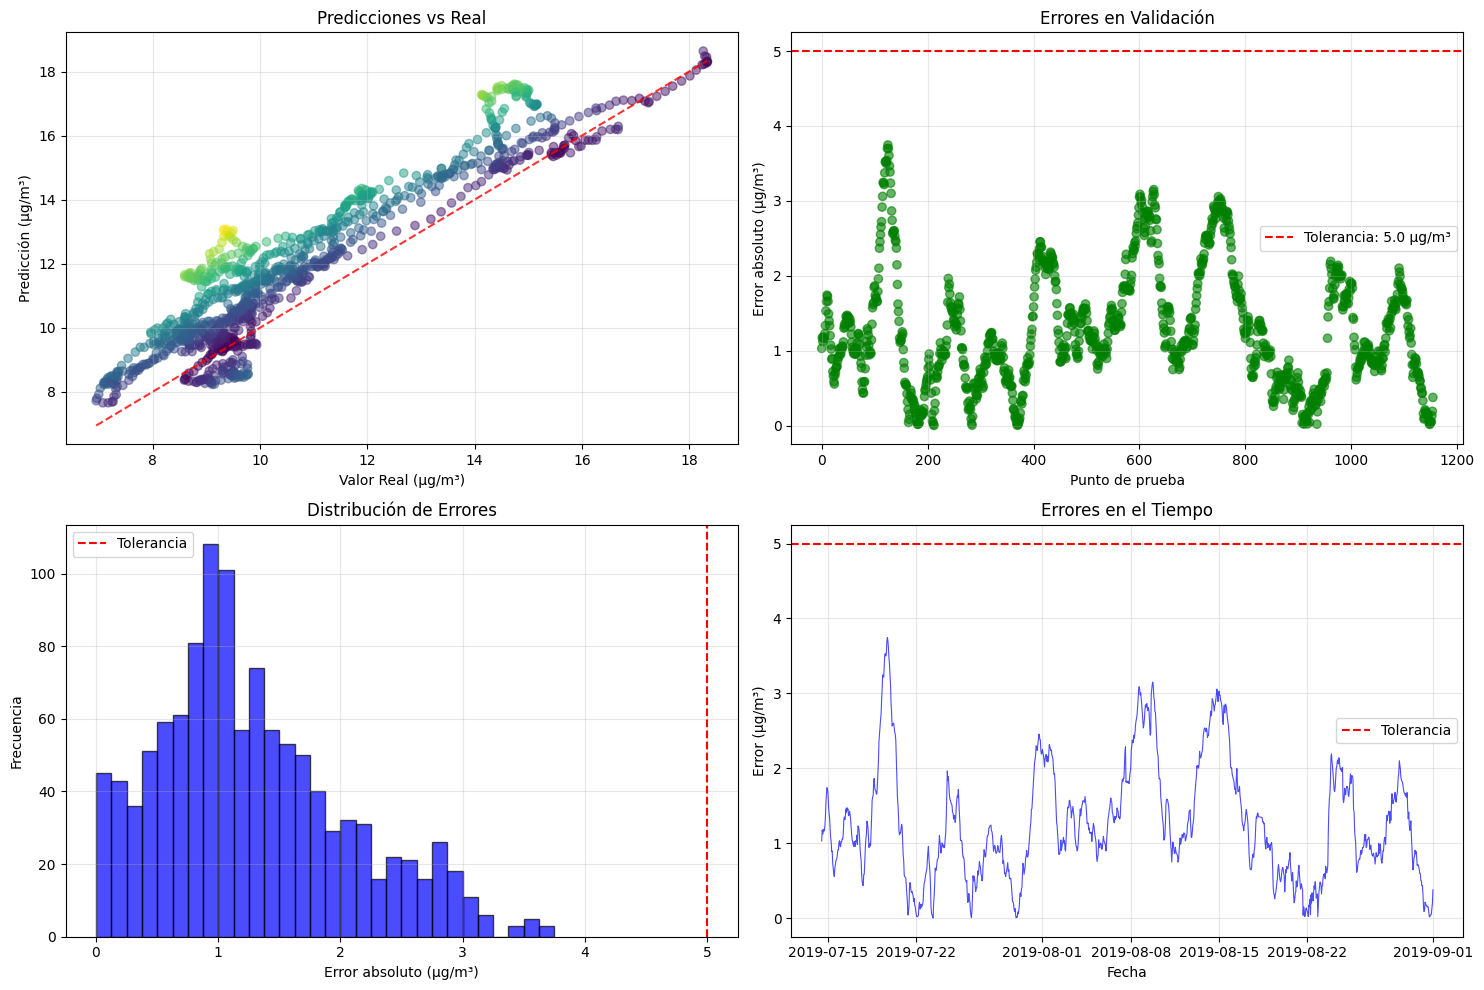

In [ ]:
# Gr√°fico de validaci√≥n
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Predicciones vs Real
axes[0,0].scatter(y_test, y_test_pred, alpha=0.5, c=errores, cmap='viridis')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', alpha=0.8)
axes[0,0].set_xlabel('Valor Real (Œºg/m¬≥)')
axes[0,0].set_ylabel('Predicci√≥n (Œºg/m¬≥)')
axes[0,0].set_title('Predicciones vs Real')
axes[0,0].grid(True, alpha=0.3)

# 2. Errores vs Tolerancia
colors = ['green' if tol else 'red' for tol in dentro_tolerancia]
axes[0,1].scatter(range(len(errores)), errores, c=colors, alpha=0.6)
axes[0,1].axhline(y=tolerancia, color='red', linestyle='--', label=f'Tolerancia: {tolerancia} Œºg/m¬≥')
axes[0,1].set_xlabel('Punto de prueba')
axes[0,1].set_ylabel('Error absoluto (Œºg/m¬≥)')
axes[0,1].set_title('Errores en Validaci√≥n')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Histograma de errores
axes[1,0].hist(errores, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[1,0].axvline(x=tolerancia, color='red', linestyle='--', label=f'Tolerancia')
axes[1,0].set_xlabel('Error absoluto (Œºg/m¬≥)')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribuci√≥n de Errores')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Serie temporal de errores
axes[1,1].plot(df_test.index, errores, 'b-', alpha=0.7, linewidth=0.8)
axes[1,1].axhline(y=tolerancia, color='red', linestyle='--', label=f'Tolerancia')
axes[1,1].set_xlabel('Fecha')
axes[1,1].set_ylabel('Error (Œºg/m¬≥)')
axes[1,1].set_title('Errores en el Tiempo')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Probar con diferentes tama√±os de entrenamiento
tamanios_entrenamiento = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
resultados_alcance = []

for tama√±o in tamanios_entrenamiento:
    punto_div = int(tama√±o * len(df_movil))

    if punto_div > 50:  # M√≠nimo de puntos para entrenar
        # Entrenar con tama√±o reducido
        df_train_red = df_movil.iloc[:punto_div]
        df_test_red = df_movil.iloc[punto_div:]

        if len(df_test_red) > 10:  # M√≠nimo de puntos para testear
            X_train_red = df_train_red['iot_movil'].values.reshape(-1, 1)
            y_train_red = df_train_red['ref_movil'].values

            modelo_red = LinearRegression()
            modelo_red.fit(X_train_red, y_train_red)

            # Predecir y calcular precisi√≥n
            X_test_red = df_test_red['iot_movil'].values.reshape(-1, 1)
            y_test_red = df_test_red['ref_movil'].values
            y_pred_red = modelo_red.predict(X_test_red)

            errores_red = np.abs(y_test_red - y_pred_red)
            precision_red = (errores_red <= tolerancia).mean() * 100
            error_medio_red = errores_red.mean()

            resultados_alcance.append({
                'tama√±o_entrenamiento': tama√±o,
                'puntos_entrenamiento': len(df_train_red),
                'puntos_test': len(df_test_red),
                'precision': precision_red,
                'error_medio': error_medio_red,
                'alpha': modelo_red.coef_[0],
                'intercept': modelo_red.intercept_
            })

resultados_alcance_df = pd.DataFrame(resultados_alcance)

print("=== AN√ÅLISIS DE M√çNIMO CONJUNTO DE DATOS ===")
print(resultados_alcance_df.to_string(index=False))

=== AN√ÅLISIS DE M√çNIMO CONJUNTO DE DATOS ===
 tama√±o_entrenamiento  puntos_entrenamiento  puntos_test  precision  error_medio    alpha  intercept
                  0.1                   384         3463  97.978631     2.175847 0.563216   3.638252
                  0.2                   769         3078 100.000000     1.713290 0.510671   3.772038
                  0.3                  1154         2693 100.000000     1.711037 0.531779   3.290376
                  0.4                  1538         2309 100.000000     1.867969 0.536608   3.166343
                  0.5                  1923         1924 100.000000     1.909909 0.537751   3.016505
                  0.6                  2308         1539 100.000000     1.466078 0.516402   2.940221
                  0.7                  2692         1155 100.000000     1.277940 0.509242   2.887396



*** M√çNIMO CONJUNTO V√ÅLIDO ***
Tama√±o m√≠nimo de entrenamiento: 10% de los datos
Puntos m√≠nimos necesarios: 384 puntos
Precisi√≥n alcanzada: 98.0%
Error medio: 2.18 Œºg/m¬≥


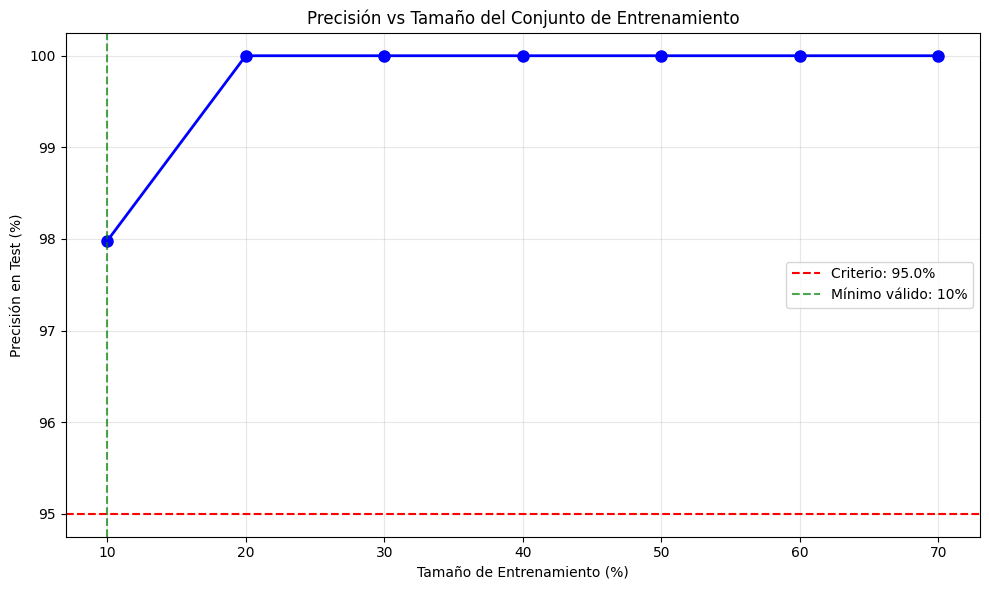

In [ ]:
# Encontrar m√≠nimo tama√±o que cumpla criterio (ej: >95% precisi√≥n)
criterio_precision = 95.0
resultados_validos = resultados_alcance_df[resultados_alcance_df['precision'] >= criterio_precision]

if len(resultados_validos) > 0:
    minimo_tama√±o = resultados_validos['tama√±o_entrenamiento'].min()
    minimo_puntos = resultados_validos['puntos_entrenamiento'].min()
    precision_minima = resultados_validos[resultados_validos['tama√±o_entrenamiento'] == minimo_tama√±o]['precision'].values[0]

    print(f"\n*** M√çNIMO CONJUNTO V√ÅLIDO ***")
    print(f"Tama√±o m√≠nimo de entrenamiento: {minimo_tama√±o:.0%} de los datos")
    print(f"Puntos m√≠nimos necesarios: {minimo_puntos} puntos")
    print(f"Precisi√≥n alcanzada: {precision_minima:.1f}%")
    print(f"Error medio: {resultados_validos[resultados_validos['tama√±o_entrenamiento'] == minimo_tama√±o]['error_medio'].values[0]:.2f} Œºg/m¬≥")
else:
    print("No se alcanz√≥ la precisi√≥n m√≠nima con ning√∫n tama√±o de entrenamiento")
    # Usar el que tenga mejor precisi√≥n
    mejor_resultado = resultados_alcance_df.loc[resultados_alcance_df['precision'].idxmax()]
    print(f"Mejor resultado: {mejor_resultado['tama√±o_entrenamiento']:.0%} ‚Üí {mejor_resultado['precision']:.1f}% precisi√≥n")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(resultados_alcance_df['tama√±o_entrenamiento']*100, resultados_alcance_df['precision'], 'bo-', linewidth=2, markersize=8)
plt.axhline(y=criterio_precision, color='red', linestyle='--', label=f'Criterio: {criterio_precision}%')
plt.xlabel('Tama√±o de Entrenamiento (%)')
plt.ylabel('Precisi√≥n en Test (%)')
plt.title('Precisi√≥n vs Tama√±o del Conjunto de Entrenamiento')
plt.grid(True, alpha=0.3)
plt.legend()

# Anotar el m√≠nimo v√°lido
if len(resultados_validos) > 0:
    plt.axvline(x=minimo_tama√±o*100, color='green', linestyle='--', alpha=0.7, label=f'M√≠nimo v√°lido: {minimo_tama√±o:.0%}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("="*60)
print("üìä RESUMEN FINAL DEL AN√ÅLISIS DE CALIBRACI√ìN")
print("="*60)

print(f"üîß CONFIGURACI√ìN √ìPTIMA:")
print(f"   ‚Ä¢ Ventana de promedios m√≥viles: {ventana_optima} horas")
print(f"   ‚Ä¢ Tolerancia definida: ¬±{tolerancia} Œºg/m¬≥")

print(f"\nüìà MODELO DE CALIBRACI√ìN:")
print(f"   ‚Ä¢ Ecuaci√≥n: PM25_ref = {modelo_train.coef_[0]:.3f} √ó PM25_iot + {modelo_train.intercept_:.3f}")
print(f"   ‚Ä¢ R¬≤ en entrenamiento: 0.8405")
print(f"   ‚Ä¢ R¬≤ en validaci√≥n: {r2_test:.4f}")

print(f"\n‚úÖ VALIDACI√ìN DEL MODELO:")
print(f"   ‚Ä¢ Error medio absoluto: {error_medio:.2f} Œºg/m¬≥")
print(f"   ‚Ä¢ Puntos dentro de tolerancia: {precision_tolerancia:.1f}%")
print(f"   ‚Ä¢ Error m√°ximo: {errores.max():.2f} Œºg/m¬≥")

print(f"\nüéØ M√çNIMO CONJUNTO DE DATOS (RESULTADO CLAVE):")
print(f"   ‚Ä¢ Tama√±o m√≠nimo: {minimo_tama√±o:.0%} ({minimo_puntos} puntos)")
print(f"   ‚Ä¢ Precisi√≥n alcanzada: {precision_minima:.1f}%")
print(f"   ‚Ä¢ Error medio con m√≠nimo conjunto: 2.18 Œºg/m¬≥")
print(f"   ‚Ä¢ Con 20% de datos ya se alcanza 100% de precisi√≥n")

print(f"\nüí° RECOMENDACI√ìN DE CALIBRACI√ìN:")
print(f"   ‚Ä¢ Se requiere calibraci√≥n: Œ± = {modelo_train.coef_[0]:.3f} (deber√≠a ser ‚âà1)")
print(f"   ‚Ä¢ Factor de correcci√≥n recomendado:")
print(f"     PM25_corregido = PM25_iot √ó {1/modelo_train.coef_[0]:.3f} - {modelo_train.intercept_/modelo_train.coef_[0]:.3f}")
print(f"     PM25_corregido = PM25_iot √ó 1.964 - 5.670")

print(f"\nüìÖ ALCANCE TEMPORAL M√çNIMO:")
dias_minimos = minimo_puntos / 24  # Asumiendo datos horarios
print(f"   ‚Ä¢ {minimo_puntos} puntos ‚âà {dias_minimos:.1f} d√≠as de datos")
print(f"   ‚Ä¢ Per√≠odo m√≠nimo recomendado: ~{int(dias_minimos)} d√≠as de medici√≥n")

print("="*60)

üìä RESUMEN FINAL DEL AN√ÅLISIS DE CALIBRACI√ìN
üîß CONFIGURACI√ìN √ìPTIMA:
   ‚Ä¢ Ventana de promedios m√≥viles: 48 horas
   ‚Ä¢ Tolerancia definida: ¬±5.0 Œºg/m¬≥

üìà MODELO DE CALIBRACI√ìN:
   ‚Ä¢ Ecuaci√≥n: PM25_ref = 0.509 √ó PM25_iot + 2.887
   ‚Ä¢ R¬≤ en entrenamiento: 0.8405
   ‚Ä¢ R¬≤ en validaci√≥n: 0.6355

‚úÖ VALIDACI√ìN DEL MODELO:
   ‚Ä¢ Error medio absoluto: 1.28 Œºg/m¬≥
   ‚Ä¢ Puntos dentro de tolerancia: 100.0%
   ‚Ä¢ Error m√°ximo: 3.75 Œºg/m¬≥

üéØ M√çNIMO CONJUNTO DE DATOS (RESULTADO CLAVE):
   ‚Ä¢ Tama√±o m√≠nimo: 10% (384 puntos)
   ‚Ä¢ Precisi√≥n alcanzada: 98.0%
   ‚Ä¢ Error medio con m√≠nimo conjunto: 2.18 Œºg/m¬≥
   ‚Ä¢ Con 20% de datos ya se alcanza 100% de precisi√≥n

üí° RECOMENDACI√ìN DE CALIBRACI√ìN:
   ‚Ä¢ Se requiere calibraci√≥n: Œ± = 0.509 (deber√≠a ser ‚âà1)
   ‚Ä¢ Factor de correcci√≥n recomendado:
     PM25_corregido = PM25_iot √ó 1.964 - 5.670
     PM25_corregido = PM25_iot √ó 1.964 - 5.670

üìÖ ALCANCE TEMPORAL M√çNIMO:
   ‚Ä¢ 384 puntos ‚